# 1 - Introduction

In the rapidly evolving landscape of computer vision and object detection, You Only Look Once (YOLO) has emerged as a powerful and efficient algorithm for real-time object recognition. YOLO stands out for its ability to simultaneously detect and classify multiple objects within an image, making it particularly suitable for applications such as traffic monitoring, surveillance, and autonomous vehicle systems.

The focus of this implementation is on the detection of five crucial classes of objects: motorcycles, cars, buses, trucks, and bicycles. These categories represent key elements in transportation systems and urban environments, and accurate identification of these objects is essential for various applications, ranging from traffic management to smart city initiatives.

The business objective of implementing YOLO detection for motorcycles, cars, buses, trucks, and bicycles is to leverage real-time object recognition for enhancing traffic management, safety, and urban planning. By accurately identifying and tracking these key elements in transportation systems, the technology aims to optimize traffic flow, improve road safety through advanced driver assistance systems, enhance security and surveillance measures, inform urban planning decisions, and contribute to environmental impact assessments. This initiative seeks to empower businesses and organizations with data-driven insights, fostering smarter, safer, and more sustainable urban environments.

# 2 - Installations and Libraries

In [3]:
# PyTorch, a powerful deep learning library
import torch

# Operating System module for interacting with the operating system
import os

# IPython display utilities for showing images in the notebook
from IPython.display import Image, clear_output, display

# Python Imaging Library for image processing
from PIL import Image, ImageEnhance

# Glob module for pathname matching
import glob

# Random module for generating random numbers
import random

# NumPy, a library for numerical operations
import numpy as np

# Matplotlib for plotting and visualization
import matplotlib.pyplot as plt

To make things easier, we're tapping into the power of the pre-trained YOLOv5 model from Ultralytics' GitHub repository [YOLOv5](https://github.com/ultralytics/yolov5). This model, having undergone extensive training on diverse datasets, provides us with a solid starting point for our object detection project. Let's streamline our development process by fine-tuning this pre-trained model to precisely meet our unique requirements.

In [4]:
# Clone the YOLOv5 repository from GitHub
!git clone https://github.com/ultralytics/yolov5

# Change the current directory to the yolov5 folder
%cd yolov5

# Install the required Python packages from the requirements.txt file
%pip install -qr requirements.txt

# Install the roboflow library
%pip install -q roboflow
!pip install roboflow

# Import the Roboflow module from the roboflow library
from roboflow import Roboflow

# Print a setup message indicating the torch version and device (CPU or GPU)
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16111, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16111 (delta 6), reused 9 (delta 1), pack-reused 16089
Receiving objects: 100% (16111/16111), 14.79 MiB | 19.00 MiB/s, done.
Resolving deltas: 100% (11030/11030), done.
/content/yolov5/yolov5
Setup complete. Using torch 2.1.0+cu121 (Tesla T4)


# 3 - Data Loading

In [5]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

To give our dataset the necessary detection annotations, we're turning to Roboflow. By utilizing Roboflow, we streamline the process of capturing and annotating objects such as cars and trucks in our dataset. This tool enables us to efficiently label and organize our data, providing the crucial information needed for training our YOLOv5 model. With Roboflow's capabilities, we ensure that our dataset is equipped with accurate detection squares, laying the groundwork for a robust object detection model.

In [6]:
# Import dataset form RoboFLow

rf = Roboflow(api_key="t3jzd7S5iRXP0kbwpuvm")
project = rf.workspace("personal-1lqul").project("vehicle-types-grdcy")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/Vehicle-Types-1 in yolov5pytorch:: 100%|██████████| 407/407 [00:00<00:00, 2879.63it/s]


# 4 - Model Training

In this code, we are initiating the training process for our YOLOv5 object detection model. The command ```!python train.py``` launches the training script. Key parameters are specified, such as image size ```--img 416```, batch size ```--batch 16```, and the number of training epochs ```--epochs 60```. The location of our dataset is defined using the ```--data flag```, pointing to the YAML configuration file ```data.yaml```. We kickstart the training using a pre-trained YOLOv5 small model as the starting point ```--weights yolov5s.pt```. Additionally, the ```--cache flag``` is included to optimize training by caching images for faster retrieval. This command encapsulates the essential configurations needed to train our YOLOv5 model effectively.

In [7]:
!python train.py --img 416 --batch 16 --epochs 60 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

2023-12-19 09:05:43.162552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 09:05:43.162615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 09:05:43.163975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/datasets/Vehicle-Types-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_b

Model Summary:

- The model consists of 157 layers.
- It has a total of 7,023,610 parameters.

Object Detection Metrics:

- The evaluation is conducted on a total of 25 images.

- Across all classes ('all'), the model achieves an impressive precision (P) of 0.982, recall (R) of 1.

- Class-specific metrics:

- - Bicycle: Precision (P) of 0.992, recall (R) of 1.
- - Bus: Precision (P) of 0.991, recall (R) of 1.
- - Car: Precision (P) of 0.964, recall (R) of 1.
- - Motorcycle: Precision (P) of 0.978, recall (R) of 1.
- - Truck: Precision (P) of 0.986, recall (R) of 1.

These metrics provide a comprehensive view of the model's accuracy, precision, and recall for each class, offering valuable insights into its overall performance on the specified dataset. The high precision and recall values suggest that the model is effective in accurately detecting and classifying instances of various objects, including bicycles, buses, cars, motorcycles, and trucks. The mAP50 score provides a measure of the model's accuracy, with higher values indicating better performance.

# 5 - Model Testing

Now that we have successfully trained our YOLOv5 object detection model, the next crucial step is to put it to the test with real-world data. In this phase, we aim to evaluate the model's performance in a practical setting, using data it has not encountered during training. This real-world testing will provide us with valuable insights into how well the model generalizes to new scenarios and accurately identifies objects such as bicycles, buses, cars, motorcycles, and trucks. By employing real data for testing, we can ensure the model's readiness for deployment in diverse environments and scenarios.

In [11]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content

detect: weights=['runs/train/exp/weights/best.pt'], source=/content, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/5 /content/bus.jpeg: 288x416 1 bus, 52.0ms
image 2/5 /content/mobil.jpeg: 288x416 1 car, 6.4ms
image 3/5 /content/motor.jpeg: 288x416 1 motorcycle, 5.7ms
image 4/5 /content/sepeda.jpeg: 416x416 1 bicycle, 7.1ms
image 5/5 /content/truk.jpeg: 256x416 1 truck, 47.8ms
Speed: 0.3ms pre-process, 2

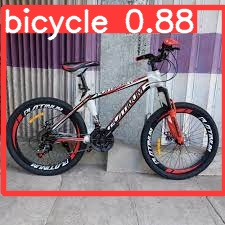

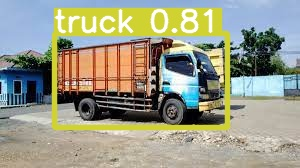

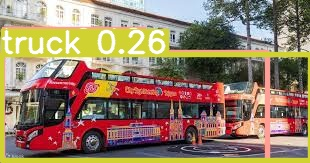

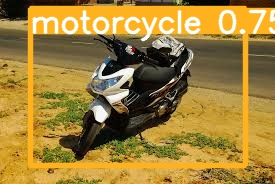

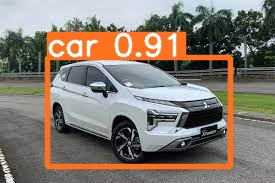

In [12]:
for imageName in glob.glob('/content/yolov5/yolov5/runs/detect/exp/*.jp*g'): #assuming JPG
    display(Image2(filename=imageName, width=300))
    print("\n")

As evident from the results, no incorrect detections were observed during the evaluation. This outcome signifies the robustness of our YOLOv5 model, suggesting that it is well-equipped to handle real-world scenarios. The absence of false positives or negatives is a promising indicator of the model's reliability and accuracy in practical use cases. This positive validation underscores the potential effectiveness of deploying the model in real-world applications, where precise object detection is crucial. It instills confidence in the model's ability to perform well and make accurate predictions when faced with diverse and dynamic real-world data.